In [35]:
fdir = "../hanglog/mild_swinging"

import os, sys
sys.path.append("..")
import hacktrack.loaders
import pandas, numpy
from matplotlib import pyplot as plt
from hacktrack import loaders, utils
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])
fd = loaders.FlyDat(fLog)
fd.LoadC("ZY")

['hdata-2021-01-05_19-24-22.log']
Extracting knowndate from filename: 2021-01-05
E:1, Y:17596, Z:17374, aZ:1026, aA:1026, aF:1009
linAdifftime 28119431.929856114 count 1112
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2021-01-05 19:22:58.029930
Made for Z 17374 last index 17374
Warning, using guessed (not GPS) timing corrected value on Z 17374
pCattrname pZ
Made for Y 17596 last index 17596
Warning, using guessed (not GPS) timing corrected value on Y 17596
pCattrname pY


2

<IPython.core.display.Javascript object>


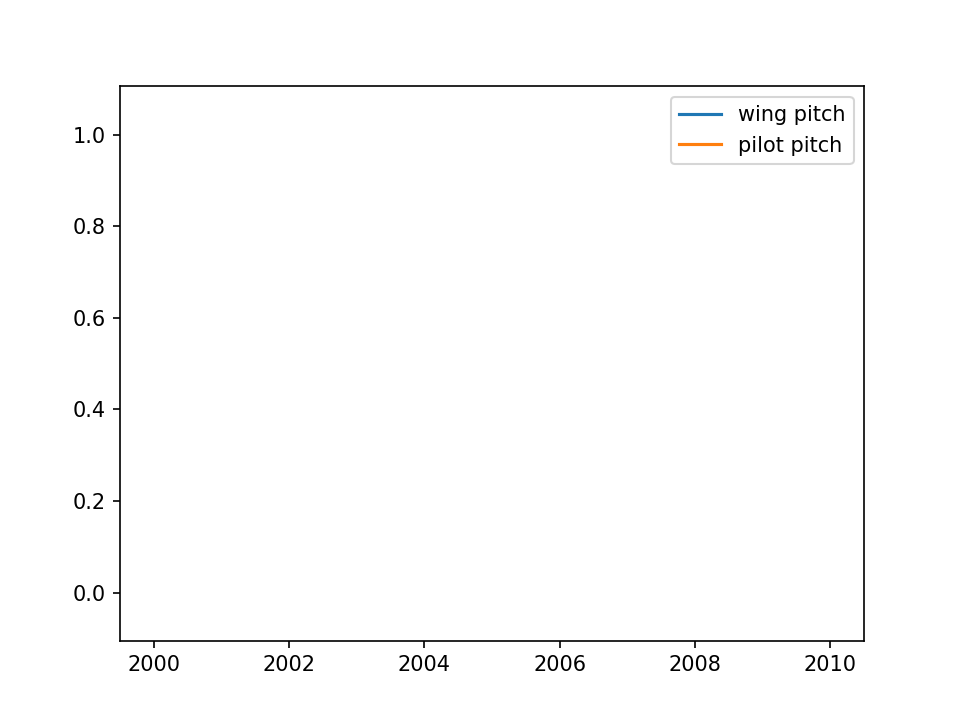

In [34]:
pilot = fd.pZ[~fd.pZ.bad]
wing = fd.pY[~fd.pY.bad]
%matplotlib notebook


fig = plt.figure()
plt.plot(wing.pitch, label = 'wing pitch')
#plt.plot(wing.heading, label = 'wing heading')
plt.plot(pilot.pitch, label = 'pilot pitch')
#plt.plot(pilot.heading, label = 'pilot heading')
plt.legend()

<IPython.core.display.Javascript object>


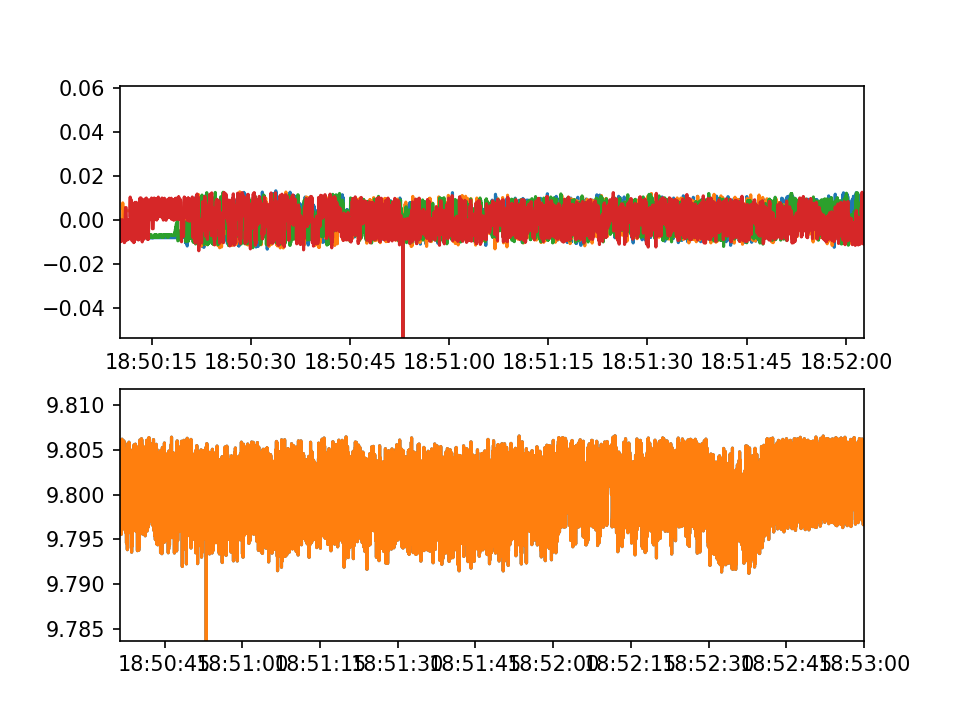

In [32]:
gvec_wing = utils.qvec((wing.q0,-wing.q1,-wing.q2,-wing.q3),(wing.gx,wing.gy,wing.gz))
gvec_pilot = utils.qvec((pilot.q0,-pilot.q1,-pilot.q2,-pilot.q3),(pilot.gx,pilot.gy,pilot.gz))
fig = plt.figure()
plt.subplot(211)
plt.plot(gvec_wing[0])
plt.plot(gvec_wing[1])
plt.plot(gvec_pilot[0])
plt.plot(gvec_pilot[1])
plt.subplot(212)
plt.plot(gvec_pilot[2])
plt.plot(gvec_pilot[2])

In [4]:
pilot

,ax,ay,az,gx,gy,gz,q0,q1,q2,q3,s,iqsq,pitch,roll,heading,bad
2021-01-01 18:50:08.685454,-0.03,-0.07,-0.08,0.21,-0.05,-9.8,40.0,-16382.0,127.0,-182.0,247.0,3.725494e-09,-0.289615,1.270778,90.891556,False
2021-01-01 18:50:08.696454,0.00,-0.07,-0.17,0.21,-0.04,-9.8,36.0,-16382.0,127.0,-182.0,247.0,3.725498e-09,-0.261640,1.270997,90.891246,False
2021-01-01 18:50:08.709454,-0.01,-0.11,-0.22,0.21,-0.04,-9.8,34.0,-16382.0,127.0,-182.0,247.0,3.725500e-09,-0.247653,1.271106,90.891091,False
2021-01-01 18:50:08.718454,-0.02,-0.08,-0.17,0.21,-0.04,-9.8,32.0,-16382.0,127.0,-182.0,247.0,3.725502e-09,-0.233665,1.271215,90.890936,False
2021-01-01 18:50:08.731454,-0.05,-0.09,-0.15,0.21,-0.03,-9.8,30.0,-16382.0,127.0,-182.0,247.0,3.725504e-09,-0.219678,1.271324,90.890781,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 18:53:19.727454,-0.09,-0.12,-0.17,0.18,-0.03,-9.8,48.0,-16254.0,-2056.0,-154.0,247.0,3.725149e-09,-0.197884,1.110703,-1724.416417,False
2021-01-01 18:53:19.736454,-0.08,-0.10,-0.13,0.19,-0.02,-9.8,44.0,-16254.0,-2056.0,-158.0,247.0,3.725136e-09,-0.166619,1.134947,-1724.416685,False
2021-01-01 18:53:19.754454,-0.10,-0.13,-0.10,0.19,-0.02,-9.8,40.0,-16254.0,-2056.0,-161.0,247.0,3.725128e-09,-0.136233,1.152252,-1724.416965,False
2021-01-01 18:53:19.765454,-0.09,-0.11,-0.09,0.20,-0.01,-9.8,33.0,-16254.0,-2056.0,-168.0,247.0,3.725103e-09,-0.081520,1.194678,-1724.417485,False


<IPython.core.display.Javascript object>


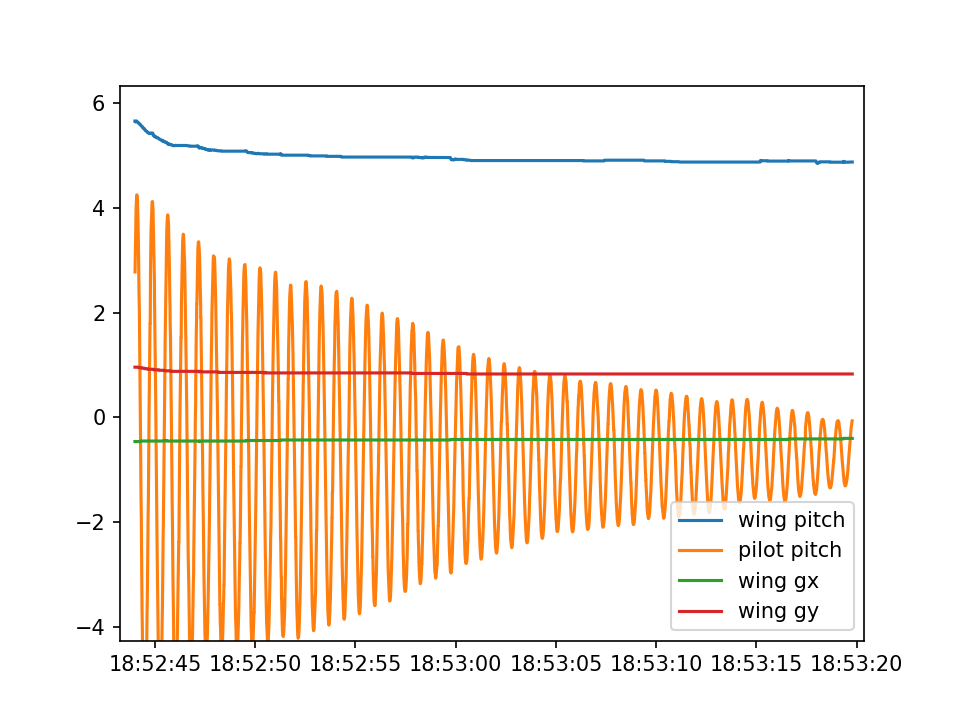

In [13]:
t0 = pandas.Timestamp('2021-01-01 18:52:44')

pilot_fit = pilot[t0:]
wing_fit = wing[t0:]

fig = plt.figure()
plt.plot(wing_fit.pitch, label = 'wing pitch')
plt.plot(pilot_fit.pitch, label = 'pilot pitch')
plt.plot(wing_fit.gx, label = 'wing gx')
plt.plot(wing_fit.gy, label = 'wing gy')
plt.legend()